In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import pandas as pd 
import numpy as np

In [2]:
data = load_breast_cancer()

data.keys()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: >

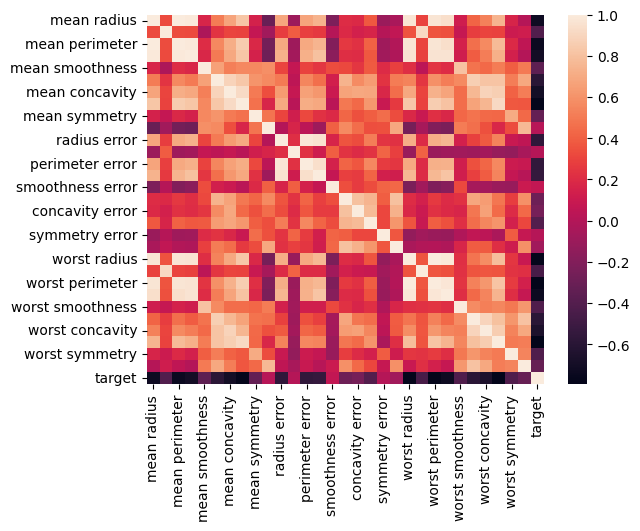

In [4]:
import seaborn as sns
sns.heatmap(df.corr())

In [5]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(~np.triu(np.ones(corr_matrix.shape)).astype(bool))
upper = upper.drop('target')
upper = upper.drop('target', axis=1)
to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
to_drop


['mean radius',
 'mean perimeter',
 'mean area',
 'radius error',
 'worst radius',
 'worst perimeter']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=34)

log_reg =LogisticRegression()
log_reg.fit(X_train, y_train)

print(log_reg.coef_, log_reg.intercept_)

[[ 1.02585532  0.42375576  0.25119923 -0.01447557 -0.03486662 -0.17868405
  -0.24594414 -0.10465849 -0.05364401 -0.00986756  0.04434168  0.29270964
   0.0201828  -0.10113245 -0.003353   -0.04108537 -0.05765368 -0.01534815
  -0.01472983 -0.00357475  1.11167611 -0.46303331 -0.26668185 -0.01342361
  -0.05743038 -0.53478817 -0.66493818 -0.20110385 -0.17602612 -0.05055245]] [0.19975338]


C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
precision_score(y_test, log_reg.predict(X_test))

0.989247311827957

In [8]:
recall_score(y_test, log_reg.predict(X_test))

0.9787234042553191

<Axes: >

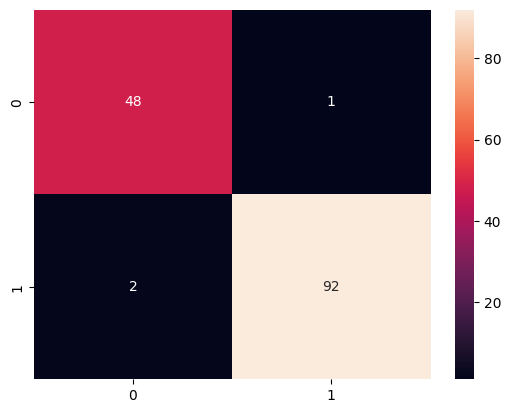

In [9]:
conf = confusion_matrix(y_test, log_reg.predict(X_test))
sns.heatmap(conf, annot=True)

**HYPERPARAMETER TUNING Logisitic Regression**

In [17]:
params = {
    "penalty" : ['l1', 'l2','elasticnet','none'],
    'C' : np.logspace(-4, 4, 20)
}

In [18]:
classifier = LogisticRegression(solver='saga')
get_best_RS = RandomizedSearchCV(estimator=classifier, param_distributions= params, cv=3, verbose=True)
get_best_GS = GridSearchCV(estimator=classifier, param_grid= params, cv=3, verbose=True,n_jobs=-1)

In [19]:
get_best_RS.fit(X_train, y_train)
get_best_GS.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: Conve

Fitting 3 folds for each of 80 candidates, totalling 240 fits


C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

GridSearchCV(cv=3, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=True)

In [20]:
get_best_GS.best_params_

{'C': 0.0018329807108324356, 'penalty': 'l1'}

In [22]:
get_best_RS.best_params_

{'penalty': 'l2', 'C': 0.00026366508987303583}

In [14]:
best_model = LogisticRegression(penalty='l1', C= 0.00183, solver='saga')
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

print("accuracy -", accuracy_score(y_test,y_pred))
print("Recall -> ", recall_score(y_test, y_pred))

accuracy - 0.9230769230769231
Recall ->  0.9787234042553191


C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Axes: >

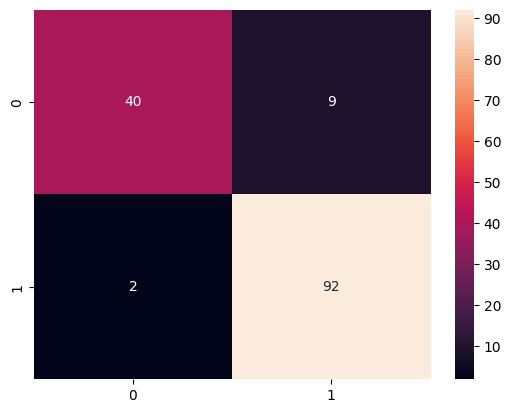

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [16]:
f1_score(y_test, y_pred)

0.9435897435897436

In [23]:
best_model = LogisticRegression(penalty='l2', C= 0.0002, solver='saga')
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

print("accuracy -", accuracy_score(y_test,y_pred))
print("Recall -> ", recall_score(y_test, y_pred))

accuracy - 0.9300699300699301
Recall ->  0.9787234042553191


C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Axes: >

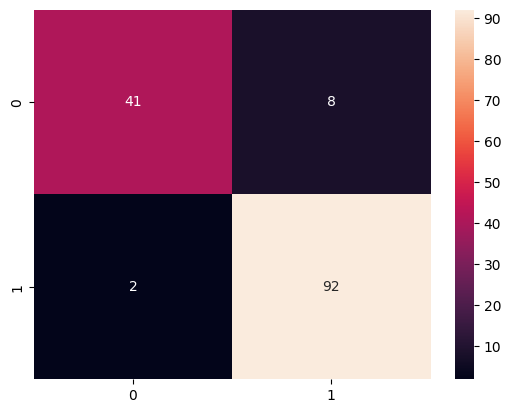

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)